<a href="https://colab.research.google.com/github/bjuhasz7054/NBD_Deep_learning/blob/main/Deep_learning_NHF_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NBD: Recognizing facial features
Members of the team: Domonkos Debreczeni, Nándor Szécsényi, Benedek Juhász


##Aims and goals of our project
Just to be clear, our project's topic is the 3rd from the list, "Recognizing facial features" and all of our goals and ideas are inspired by the topic's official description. 

Given our team's average experience, in this semester we chose a (for us) new approach, which involves working in the latent space. Let us clarify what we mean by looking at a possible schedule for this semester:
1. First (after all the data preparation and exploration in this notebook) we train a neural network on the multi label classification dataset, FairFace.
2. After training the model and reaching a high enough accuracy (its exact quantity hasn't been determined), we will begin analyzing the latent spaces vectors given for specific inputs.
3. Using the knowledge acquired in the last phase, we can continue our project in many ways:
- modification of latent space vectors, which can then be fed to a decoding subnetwork (resulting in a change in the input face's features)
- creating latent space vectors by "hand" and then examining the decoded faces.

We would like to emphasize that, the former schedule is merely a plan, we are open to any ideas and experiences during this project. 

Downloading and unzipping the FairFace dataset

In [ ]:
!gdown --id 1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86


Downloading...
From: https://drive.google.com/uc?id=1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86
To: /content/fairface-img-margin025-trainval.zip
100% 578M/578M [00:04<00:00, 140MB/s]


In [ ]:
!unzip fairface-img-margin025-trainval.zip
!rm fairface-img-margin025-trainval.zip

Archive:  fairface-img-margin025-trainval.zip
replace train/1346.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Downloading the training and validation label files

In [ ]:
!gdown --id 1i1L3Yqwaio7YSOCj7ftgk8ZZchPG7dmH

Downloading...
From: https://drive.google.com/uc?id=1i1L3Yqwaio7YSOCj7ftgk8ZZchPG7dmH
To: /content/fairface_label_train.csv
100% 3.79M/3.79M [00:00<00:00, 115MB/s]


In [ ]:
!gdown --id 1wOdja-ezstMEp81tX1a-EYkFebev4h7D

Downloading...
From: https://drive.google.com/uc?id=1wOdja-ezstMEp81tX1a-EYkFebev4h7D
To: /content/fairface_label_val.csv
100% 448k/448k [00:00<00:00, 59.4MB/s]


##Analysing the label files

Loading the data from csv files

In [ ]:
import pandas as pd 

train_labels_df = pd.read_csv("fairface_label_train.csv")
val_labels_df = pd.read_csv("fairface_label_val.csv")

train_labels_df.head(5)





,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True


All above columns have quite self explanatory names, bar one, the "service_test" column. On the datasets official github page no information could be found regarding the last column. In the below cell the number of rows with "service_test"=True and "service_test"=False values are printed, unfortunately providing no further information.

In [ ]:
print(len(train_labels_df.loc[train_labels_df["service_test"]==False].index))
print(len(train_labels_df.loc[train_labels_df["service_test"]==True].index))

46492
40252


In [ ]:
print("Number of rows in training label file: " + str(len(train_labels_df.index)))

Number of rows in training label file: 86744


In [ ]:
val_labels_df.head(10)

,file,age,gender,race,service_test
0,val/1.jpg,3-9,Male,East Asian,False
1,val/2.jpg,50-59,Female,East Asian,True
2,val/3.jpg,30-39,Male,White,True
3,val/4.jpg,20-29,Female,Latino_Hispanic,True
4,val/5.jpg,20-29,Male,Southeast Asian,False
5,val/6.jpg,30-39,Male,Latino_Hispanic,False
6,val/7.jpg,20-29,Male,Black,True
7,val/8.jpg,3-9,Male,East Asian,False
8,val/9.jpg,20-29,Male,Southeast Asian,False
9,val/10.jpg,3-9,Male,Southeast Asian,False


In [ ]:
print("Number of rows in validation label file: " + str(len(val_labels_df.index)))

Number of rows in validation label file: 10954


Number of rows with NaN values

In [ ]:
print("Number of rows containing NaN values in training labels: " + str(len(train_labels_df[train_labels_df.isna().any(axis=1)].index)))

Number of rows containing NaN values in training labels: 0


In [ ]:
print("Number of rows containing NaN values in validation labels: " + str(len(val_labels_df[val_labels_df.isna().any(axis=1)].index)))

Number of rows containing NaN values in validation labels: 0


Unique values in each column (except "file" and "service_test" as they would yield no useful information, the former is contains the filenames, the latters meaning/purpose is not documented)

In [ ]:
non_informative_columns = ["file", "service_test"]

In [ ]:

print("Unique values per column in the training label file:")

for column in train_labels_df.columns:
  if column not in non_informative_columns:
    print("Current column: "+column)
    print(train_labels_df[column].unique())


Unique values per column in the training label file:
Current column: age
['50-59' '30-39' '3-9' '20-29' '40-49' '10-19' '60-69' '0-2'
 'more than 70']
Current column: gender
['Male' 'Female']
Current column: race
['East Asian' 'Indian' 'Black' 'White' 'Middle Eastern' 'Latino_Hispanic'
 'Southeast Asian']


In [ ]:

print("Unique values per column in the validation label file:")

for column in val_labels_df.columns:
  if column not in non_informative_columns:
    print("Current column: "+column)
    print(val_labels_df[column].unique())

Unique values per column in the validation label file:
Current column: age
['3-9' '50-59' '30-39' '20-29' 'more than 70' '40-49' '10-19' '60-69'
 '0-2']
Current column: gender
['Male' 'Female']
Current column: race
['East Asian' 'White' 'Latino_Hispanic' 'Southeast Asian' 'Black' 'Indian'
 'Middle Eastern']


Luckily the columns in both dataframes have the same sets of unique values

Converting the columns to categorical type

In [ ]:
for current_column in train_labels_df.columns:
  if column not in non_informative_columns:
    train_labels_df[current_column] = train_labels_df[current_column].astype('category')

train_labels_df.dtypes

file            object
age             object
gender          object
race            object
service_test      bool
dtype: object

In [ ]:
train_labels_df["age"]=train_labels_df.age.astype(str)
train_labels_df.dtypes

file            object
age             object
gender          object
race            object
service_test      bool
dtype: object

In [ ]:
for current_column in val_labels_df.columns:
  if column not in non_informative_columns:
    val_labels_df[current_column] = val_labels_df[current_column].astype(str)

val_labels_df.head(5)

,file,age,gender,race,service_test
0,val/1.jpg,3-9,Male,East Asian,False
1,val/2.jpg,50-59,Female,East Asian,True
2,val/3.jpg,30-39,Male,White,True
3,val/4.jpg,20-29,Female,Latino_Hispanic,True
4,val/5.jpg,20-29,Male,Southeast Asian,False


Let's look at the number of rows per each label type

IMPORTANT: in all of the following cells we only analysed data in the training labels dataframe. Of course, later we ran all the codes using the validation dataframe too, but no additional information could be obtained, so we removed these cells to get a more compact notebook.

In [ ]:
import matplotlib.pyplot as plot

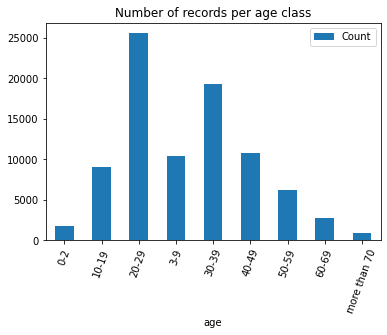

In [ ]:
#Number of rows per age

def counting_rows_per_single_column(df_aggregated_by = "age"):



  grouped_single = train_labels_df.groupby(df_aggregated_by).agg({'file': ['count']})



  grouped_single.columns = [ 'Count']

  # reset index to get grouped columns back
  grouped_single = grouped_single.reset_index()

  grouped_single.plot.bar(x=df_aggregated_by, y="Count", rot=70, title="Number of records per "+str(df_aggregated_by)+" class");

  plot.show(block=True);

#number of rows per age groups
counting_rows_per_single_column("age")

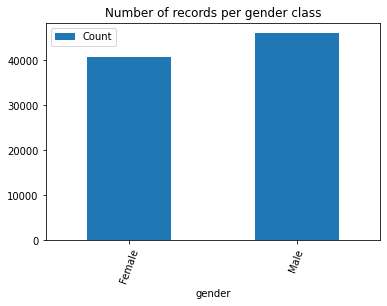

In [ ]:
#Number of rows per gender
counting_rows_per_single_column("gender")

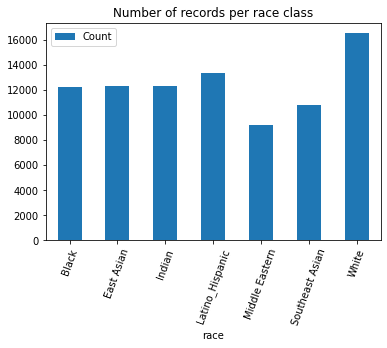

In [ ]:
#Number of rows per race
counting_rows_per_single_column("race")

Conclusions: looking at the bar plots, we can clearly see that the dataset is well balanced, with the only exception of age. It is of course undertandable, since people between the ages of 20 and 50 are more active and more keen to participate in a data collection project, then kids.

Examining the dataset by aggregating multiple columns

Grouping by gender and age

Index(['age', 'gender', 'Count'], dtype='object')


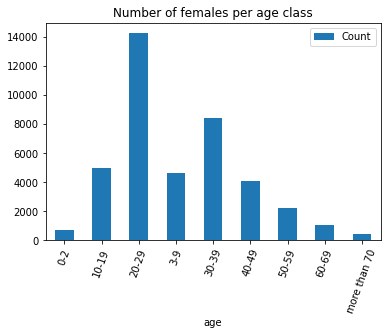

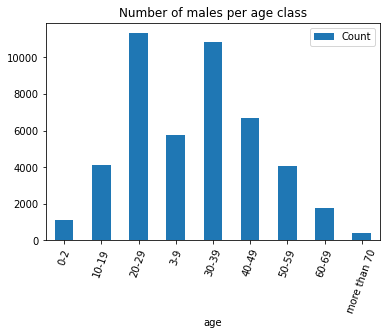

In [ ]:
#This function aggregates the dataframe and plots it per the two genders
def counting_rows_per_gender_and_age(df_aggregated_by = ["age", "gender"], ):

  grouped_multiple = train_labels_df.groupby(df_aggregated_by).agg({'file': ['count']})

  

  grouped_multiple.columns = [ 'Count']

  # reset index to get grouped columns back
  grouped_multiple = grouped_multiple.reset_index()
  print(grouped_multiple.columns)
  
  grouped_multiple.loc[(grouped_multiple["gender"]=="Female")].plot.bar(x="age", y="Count", rot=70, title="Number of females per age class");

  grouped_multiple.loc[(grouped_multiple["gender"]=="Male")].plot.bar(x="age", y="Count", rot=70, title="Number of males per age class");

  plot.show(block=True);
 
 

counting_rows_per_gender_and_age(df_aggregated_by = ["age", "gender"])

As we can see, there are more pictures of women from the 20-29 age group than men and there the number of pictures of men from the older age groups (30-49) is higher. The differences aren't that significant, the biggest discrepancy is about 2500-3000, however all this may lead to a little bit biased model in the end. (It would be most interesting to analyse the number of false positive and negative outputs predicted for these pictures.)

Grouping by gender and race

Index(['race', 'gender', 'Count'], dtype='object')


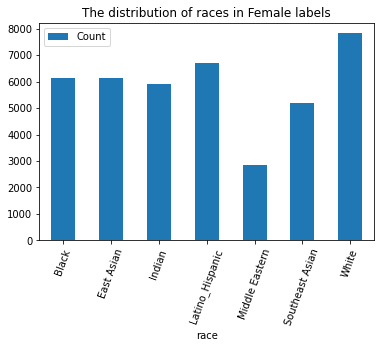

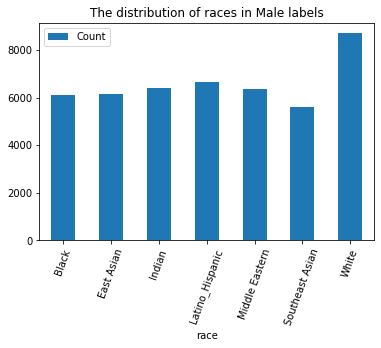

In [ ]:
#This function aggregates the dataframe and plots it per the two genders
def counting_rows_per_gender_and_race(df_aggregated_by = ["race", "gender"], ):

  grouped_multiple = train_labels_df.groupby(df_aggregated_by).agg({'file': ['count']})

  

  grouped_multiple.columns = [ 'Count']

  # reset index to get grouped columns back
  grouped_multiple = grouped_multiple.reset_index()
  print(grouped_multiple.columns)
  
  for current_value in grouped_multiple["gender"].unique():

 

    grouped_multiple.loc[(grouped_multiple["gender"]==current_value)].plot.bar(x="race", y="Count", rot=70, title="The distribution of races in "+str(current_value)+ " labels");

    

  plot.show(block=True);
 
 

counting_rows_per_gender_and_race(df_aggregated_by = ["race", "gender"])

Now this is most interesting: of course the high number of "white" labels comes as no surprise(as we have seen this earlier), but there is a clear unevennes in the female gender's race distribution, meanwhile the male gender's plot is nearly perfectly even (except of course for the afore mentioned "white") labels.

Last, but not least, let's group our dataframe by age and races

Index(['race', 'age', 'Count'], dtype='object')


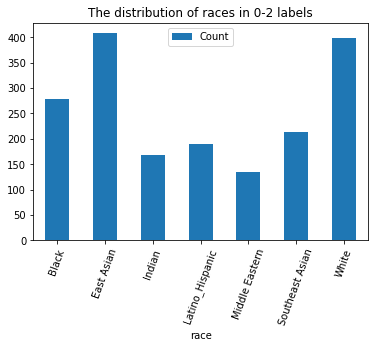

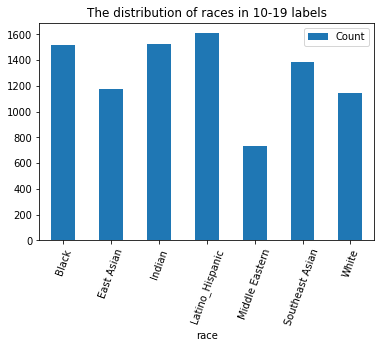

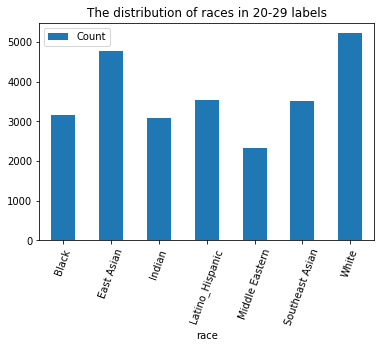

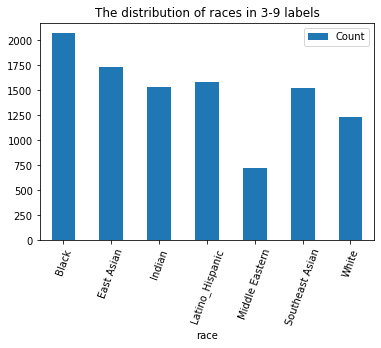

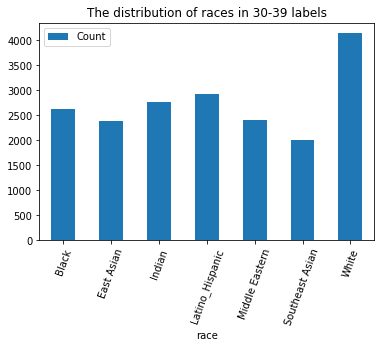

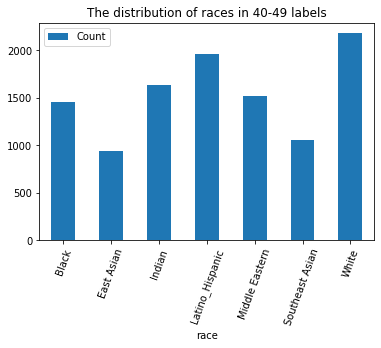

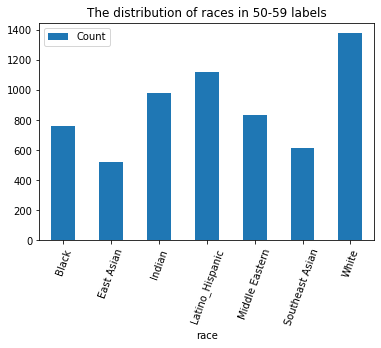

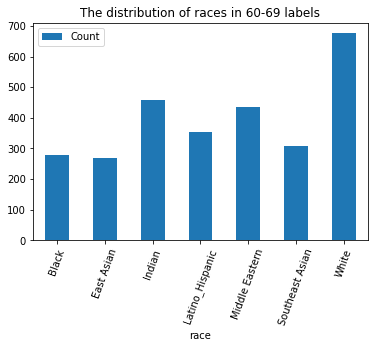

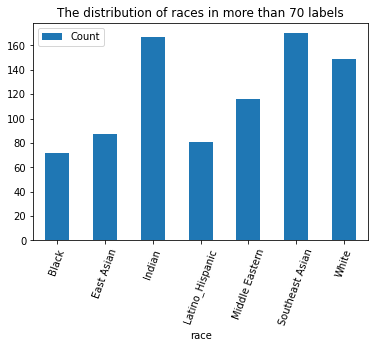

In [ ]:
#This function aggregates the dataframe and plots it per the two genders
def counting_rows_per_age_and_race(df_aggregated_by = ["race", "age"], ):

  grouped_multiple = train_labels_df.groupby(df_aggregated_by).agg({'file': ['count']})

  

  grouped_multiple.columns = [ 'Count']

  # reset index to get grouped columns back
  grouped_multiple = grouped_multiple.reset_index()
  print(grouped_multiple.columns)
  
  for current_value in grouped_multiple["age"].unique():

 

    grouped_multiple.loc[(grouped_multiple["age"]==current_value)].plot.bar(x="race", y="Count", rot=70, title="The distribution of races in "+str(current_value)+ " labels");

    

  plot.show(block=True);
 
 

counting_rows_per_age_and_race(df_aggregated_by = ["race", "age"])

Analyzing all of the above plots in detail would take a lot of time, so in order to be concise, we just mention some of our observations:
- The younger than 20 range is dominated mostly by races "Black" and "East Asian"
- THe older than 50 range is is dominated mostly by races "Indian" and "Southeast Asian"
- The "White" race has significant numbers in all of the age groups
It would be hard to give a good prediction for the trained model's properties, given the above observations, however after the training, it would be beneficial for future projects to look at these plots and the trained model's confusion matrix. 

Analyzing the images

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def plot_image_sizes(directory_path):

  size_count_dict = {}

  for image_name in os.listdir(directory_path):

    im = Image.open(os.path.join(directory_path, image_name))
    width, height = im.size

    str_size = str(width) + "x"+str(height)

    if str_size in size_count_dict:
      size_count_dict[str_size] +=1

    else:
      size_count_dict[str_size] = 1

  print("Number of images per image sizes")
  print(size_count_dict)


plot_image_sizes("train")
plot_image_sizes("val")

Number of images per image sizes
{'224x224': 86744}
Number of images per image sizes
{'224x224': 8763}


All images in the dataset (both in the training and validation directories) are 224x224

Visualizing the training images

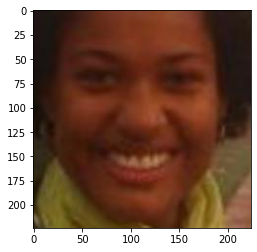

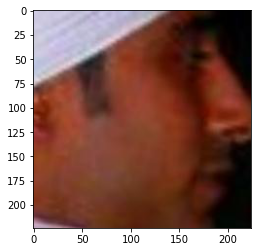

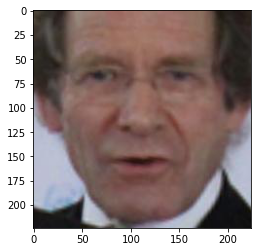

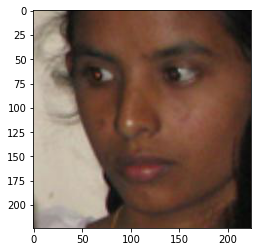

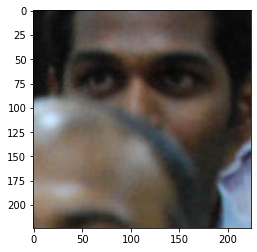

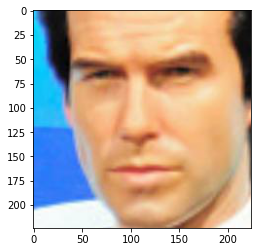

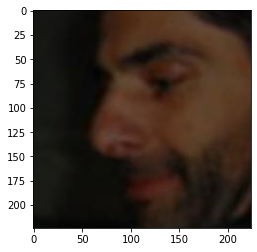

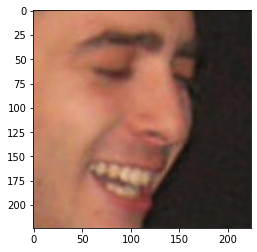

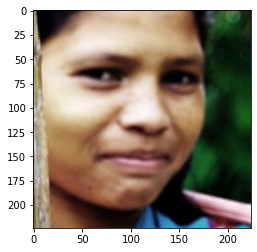

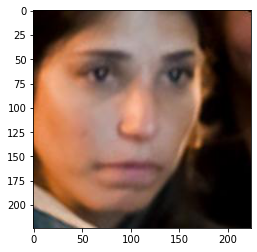

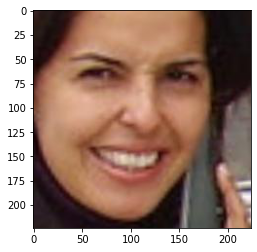

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def process(filename: str=None) -> None:
  
    image = Image.open(filename)
    
    plt.figure()
    plt.imshow(image)

directory = "train"

i = 0
for image in os.listdir(directory):

    process(os.path.join(directory, image))

    i+=1
    if i >10:
      break


Visualizing image from the validation directory

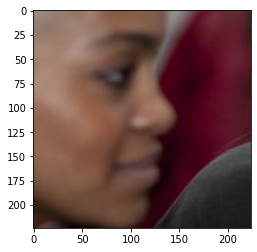

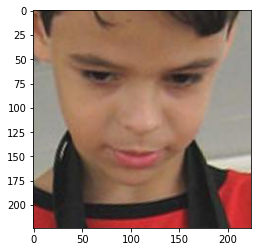

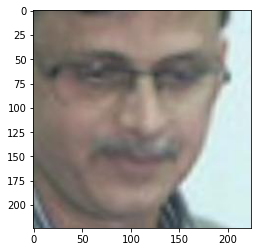

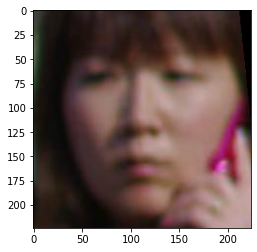

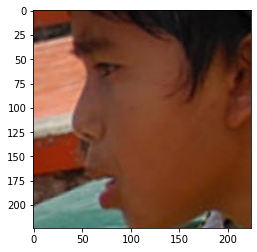

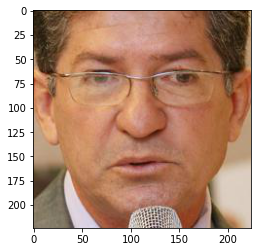

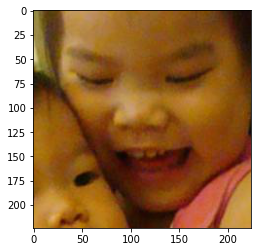

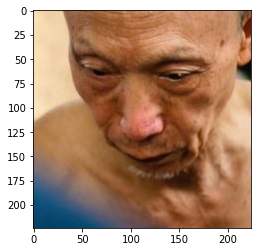

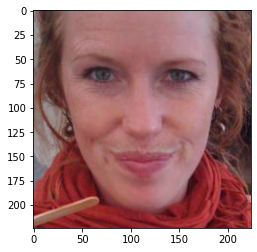

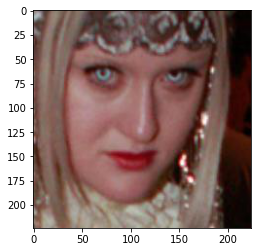

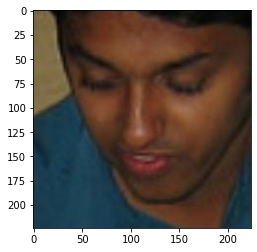

In [ ]:
directory = "val"

i = 0
for image in os.listdir(directory):

    process(os.path.join(directory, image))

    i+=1
    if i >10:
      break

You probably have noticed, that we still haven't created a testing dataset. The reason for the wait was the simpler data analysis (fewer dataframes to pass). Without further ado, in the next cells we append every 4th row of the validation label file to the new testing label file.

In [ ]:

!mkdir "test"

mkdir: cannot create directory ‘test’: File exists


In [ ]:


test_labels_df = pd.DataFrame()

for i in range(4, len(val_labels_df.index), 4):

  #Unfortunately, this is a necessary check
  if i > len(val_labels_df.index): 
    break
    
  test_labels_df=test_labels_df.append(val_labels_df.iloc[i], ignore_index=True)
  val_labels_df.drop(index =i, inplace=True)

test_labels_df.head(6)



IndexError: ignored

In [ ]:
test_labels_df.head(6)

In [ ]:
print("Number of rows in testing label file: " + str(len(test_labels_df.index)))

In [ ]:
#Making it a file
test_labels_df.to_csv("fairface_label_test.csv")

We saw no point in renaming and moving all the files from the validation folder, since working with label files is well supported nowadays.

Image augmentations and visualizing samples from both directories

In [ ]:
pip install git+https://github.com/keras-team/keras-preprocessing.git


For some of the augmentation techniques we needed a new library, view the full github repository here: https://github.com/aleju/imgaug

In [ ]:
pip install git+https://github.com/aleju/imgaug.git


Custom image augmenting/preprocessing function
Explanation in short: it is a common "trick" in computer vision projects to use lossy codings for the training images, thereby making the model learn more abstract features. Therefore we use the afore cloned library's JPEG compressing function

In [ ]:
import numpy as np
import imgaug.augmenters as iaa
from PIL import Image


def my_preprocessing_function(np_image):
  print("JPEG compression is called")  #Only serves as a flag that the function is called
  X_data = np_image

  img_list = []
  img_list.append(X_data.astype("uint8")) #This function can only work with this datatype
  
  seq_free = iaa.Sequential(
  [iaa.JpegCompression(compression=(60, 75))]) #60 - 75 means, a quality of 40 - 25
   
  return seq_free(images=img_list)[0].astype("float32")
  
 



The following cells contain code lines, which are related more to training, than preprocessing, but we figured that it would be better if any problems in our preprocessing techniques emerged earlier than later.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import random 
import numpy as np


train_datagen = ImageDataGenerator(
        rotation_range=random.randint(40,90),
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        preprocessing_function = my_preprocessing_function)




test_datagen = ImageDataGenerator(rescale=1./255)



In [ ]:

#It would be have benn a tough grind to organize our multi label data into different directories, so instead we used the flow_from_dataframe function
train_generator=train_datagen.flow_from_dataframe(
dataframe=train_labels_df,
directory=None,
x_col="file",
y_col=["age", "race", "gender"],
subset="training",
batch_size=1,
seed=42,
shuffle=False,

class_mode="raw",
target_size=(224,224), 
validate_filenames = True )

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

for i in range(4):


  image = next(train_generator)[0].astype('float32')

  # changing size from (1, 200, 200, 3) to (200, 200, 3) for plotting the image
  image = np.squeeze(image)

  # plot raw pixel data
  ax[i].imshow(image)
  ax[i].axis('off')

  